# Breast Cancer Classification Using Machine Learning

## Introduction

Breast cancer remains one of the most common malignancies affecting women worldwide. In this project, we leverage machine learning algorithms to build predictive models that classify tumors based on the Breast Cancer Wisconsin dataset.

### Dataset Overview

- *Source:* Wisconsin Breast Cancer dataset

- *Samples:* 569 instances

- *Features:* 30 real-valued measurements

- *Target:* Diagnosis (Benign = 0, Malignant = 1)

### Project Outline
- Data Loading & Initial Preprocessing

- Data Analysis

- Data Preprocessing Pipeline

- Feature Selection & Dimension Reduction

- Model Building & Cross Validation

- Hyperparameter Tuning

- Final Evaluation on Test data

- Model Interpretation

- Conclusions & Future Work

## Data Loading & Initial Preprocessing

### Import Libraries

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import auc
from sklearn.inspection import permutation_importance

### Load Dataset

In [71]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Remove Uninformative Features

In [72]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

### Encode Target Variable

In [73]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

### Split Features and Target

In [74]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=715)

## Data Analysis

### Class Distribution

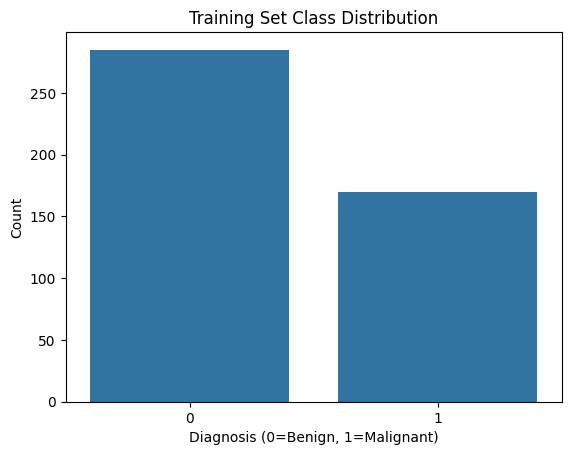

In [75]:
sns.countplot(x=y_train)
plt.title('Training Set Class Distribution')
plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')
plt.ylabel('Count')
plt.show()


### Descriptive Statistics

In [76]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,14.154103,3.561155,7.691000,11.655000,13.200000,16.150000,28.11000
texture_mean,455.0,19.277890,4.313223,9.710000,16.050000,18.800000,21.855000,33.81000
perimeter_mean,455.0,92.175538,24.593573,47.980000,74.795000,85.630000,106.750000,188.50000
area_mean,455.0,658.290549,358.554530,170.400000,415.650000,538.400000,804.100000,2501.00000
smoothness_mean,455.0,0.096491,0.014122,0.062510,0.086390,0.095940,0.105650,0.16340
compactness_mean,455.0,0.104950,0.054346,0.019380,0.064130,0.092180,0.130550,0.34540
concavity_mean,455.0,0.089128,0.079994,0.000000,0.028680,0.061260,0.132000,0.42640
concave points_mean,455.0,0.049114,0.039257,0.000000,0.020240,0.033260,0.073700,0.19130
symmetry_mean,455.0,0.180943,0.027638,0.106000,0.161650,0.179300,0.195650,0.30400
fractal_dimension_mean,455.0,0.062761,0.007037,0.050240,0.057800,0.061610,0.066035,0.09744


### Correlation Heatmap

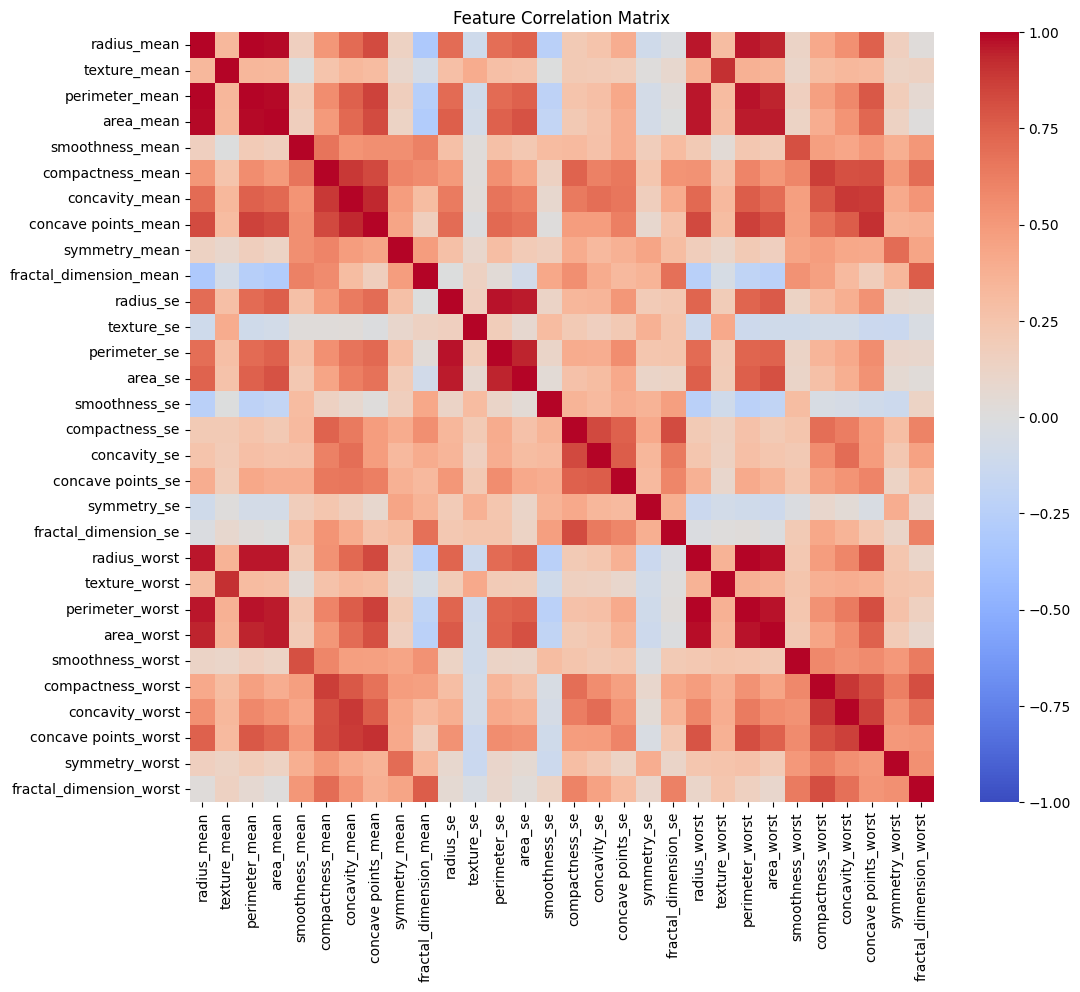

In [77]:
corr = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, vmax=1, vmin=-1)
plt.title('Feature Correlation Matrix')
plt.show()

## Data Preprocessing Pipeline

### Check for Missing Values

In [78]:
X_missing = X_train.isnull().sum()
y_missing = y_train.isnull().sum()
X_missing, y_missing

(radius_mean                0
 texture_mean               0
 perimeter_mean             0
 area_mean                  0
 smoothness_mean            0
 compactness_mean           0
 concavity_mean             0
 concave points_mean        0
 symmetry_mean              0
 fractal_dimension_mean     0
 radius_se                  0
 texture_se                 0
 perimeter_se               0
 area_se                    0
 smoothness_se              0
 compactness_se             0
 concavity_se               0
 concave points_se          0
 symmetry_se                0
 fractal_dimension_se       0
 radius_worst               0
 texture_worst              0
 perimeter_worst            0
 area_worst                 0
 smoothness_worst           0
 compactness_worst          0
 concavity_worst            0
 concave points_worst       0
 symmetry_worst             0
 fractal_dimension_worst    0
 dtype: int64,
 np.int64(0))

### Preprocessing Pipeline

In [79]:
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed  = preprocessing_pipeline.transform(X_test)

## Feature Selection & Dimension Reduction

In [80]:
feature_count = 8

### Univariate Feature Selection with SelectKBest

In [81]:
kbest_selector = SelectKBest(score_func=f_classif, k=feature_count)
X_train_kbest = kbest_selector.fit_transform(X_train_preprocessed, y_train)
X_test_kbest  = kbest_selector.transform(X_test_preprocessed)

### Recursive Feature Elimination with RFE

In [82]:
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=feature_count)
X_train_rfe = rfe_selector.fit_transform(X_train_preprocessed, y_train)
X_test_rfe  = rfe_selector.transform(X_test_preprocessed)

### Feature Importance from Random Forest

In [83]:
rf = RandomForestClassifier(random_state=715)
rf.fit(X_train_preprocessed, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:feature_count]

X_train_rf = X_train_preprocessed[:, indices]
X_test_rf  = X_test_preprocessed[:, indices]

### Principal Component Analysis (PCA)

In [84]:
pca = PCA(n_components=feature_count)
X_train_pca = pca.fit_transform(X_train_preprocessed)
X_test_pca  = pca.transform(X_test_preprocessed)

## Model Building & Cross Validation

In [85]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=715),
    'LDA': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(random_state=715),
    'Random Forest': RandomForestClassifier(random_state=715),
    'Ensemble': VotingClassifier([
        ('lr', LogisticRegression(max_iter=1000, random_state=715)),
        ('rf', RandomForestClassifier(random_state=715)),
        ('svc', SVC(probability=True, random_state=715))
    ], voting='soft'),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=715)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=715)
results = []

feature_sets = [
    ('All Features', X_train_preprocessed),
    ('SelectKBest', X_train_kbest),
    ('RFE', X_train_rfe),
    ('Random Forest Importance', X_train_rf),
    ('PCA', X_train_pca)
]

for fs_name, X_fs in feature_sets:
    for name, estimator in models.items():
        pipe = Pipeline([
            ('clf', estimator)
        ])
        scores = cross_validate(
            pipe, X_fs, y_train, cv=cv,
            scoring=['accuracy','precision','recall','f1','roc_auc']
        )
        results.append({
            'Feature Set': fs_name,
            'Model': name,
            'Accuracy Mean': scores['test_accuracy'].mean(),
            'Accuracy Std': scores['test_accuracy'].std(),
            'Precision Mean': scores['test_precision'].mean(),
            'Recall Mean': scores['test_recall'].mean(),
            'F1 Mean': scores['test_f1'].mean(),
            'ROC AUC Mean': scores['test_roc_auc'].mean()
        })

df_cv = pd.DataFrame(results).set_index(['Feature Set', 'Model'])
df_cv



Accuracy Mean  Accuracy Std  \
Feature Set              Model                                              
All Features             Logistic Regression       0.969231      0.021308   
                         LDA                       0.960440      0.016447   
                         Decision Tree             0.923077      0.031082   
                         Random Forest             0.960440      0.022628   
                         Ensemble                  0.975824      0.022413   
                         KNN                       0.967033      0.027800   
                         Naive Bayes               0.934066      0.025059   
                         SVM                       0.978022      0.023051   
SelectKBest              Logistic Regression       0.953846      0.029812   
                         LDA                       0.951648      0.024670   
                         Decision Tree             0.918681      0.017855   
                         Random Forest             0.956044      0.027800   
                         Ensemble                  0.947253      0.032894   
                         KNN                       0.947253      0.028146   
                         Naive Bayes               0.947253      0.027274   
                         SVM                       0.951648      0.029157   
RFE                      Logistic Regression       0.973626      0.024670   
                         LDA                       0.967033      0.025059   
                         Decision Tree             0.951648      0.028317   
                         Random Forest             0.956044      0.023051   
                         Ensemble                  0.973626      0.020382   
                         KNN                       0.973626      0.019160   
                         Naive Bayes               0.953846      0.025441   
                         SVM                       0.982418      0.013187   
Random Forest Importance Logistic Regression       0.953846      0.029812   
                         LDA                       0.951648      0.024670   
                         Decision Tree             0.920879      0.016150   
                         Random Forest             0.951648      0.027451   
                         Ensemble                  0.947253      0.032894   
                         KNN                       0.947253      0.028146   
                         Naive Bayes               0.947253      0.027274   
                         SVM                       0.951648      0.029157   
PCA                      Logistic Regression       0.971429      0.017855   
                         LDA                       0.953846      0.027274   
                         Decision Tree             0.925275      0.016150   
                         Random Forest             0.940659      0.031544   
                         Ensemble                  0.969231      0.018906   
                         KNN                       0.960440      0.020382   
                         Naive Bayes               0.918681      0.039069   
                         SVM                       0.975824      0.021308   

                                              Precision Mean  Recall Mean  \
Feature Set              Model                                              
All Features             Logistic Regression        0.975854     0.941176   
                         LDA                        0.993750     0.900000   
                         Decision Tree              0.898470     0.894118   
                         Random Forest              0.966068     0.929412   
                         Ensemble                   0.975854     0.958824   
                         KNN                        0.975210     0.935294   
                         Naive Bayes                0.916581     0.905882   
                         SVM                        0.981737     0.958824   
SelectKBest              Logistic Regress

## Hyperparameter Tuning

### Logistic Regression

In [86]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=715),
    param_grid_lr,
    cv=cv,
    scoring='roc_auc'
)
grid_lr.fit(X_train_rfe, y_train)

best_lr = grid_lr.best_estimator_
best_lr_params = grid_lr.best_params_
best_lr_score  = grid_lr.best_score_

### SVM

In [87]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(
    SVC(probability=True, random_state=715),
    param_grid_svm,
    cv=cv,
    scoring='roc_auc'
)
grid_svm.fit(X_train_rfe, y_train)

best_svm = grid_svm.best_estimator_
best_svm_params = grid_svm.best_params_
best_svm_score  = grid_svm.best_score_

### Ensemble

In [88]:
base_estimators = [
    ('lr', best_lr),
    ('svc', best_svm),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=715))
]

ensemble = VotingClassifier(base_estimators, voting='soft')

param_grid_ens = {
    'weights': [
        (1,1,1),
        (2,1,1),
        (1,2,1),
        (1,1,2)
    ]
}

grid_ens = GridSearchCV(
    ensemble,
    param_grid_ens,
    cv=cv,
    scoring='roc_auc'
)
grid_ens.fit(X_train_rfe, y_train)

best_ens = grid_ens.best_estimator_
best_ens_params = grid_ens.best_params_
best_ens_score  = grid_ens.best_score_


### Results

In [89]:
tuning_results = pd.DataFrame([
    ('Logistic Regression', best_lr_params, best_lr_score),
    ('SVM', best_svm_params, best_svm_score),
    ('Ensemble', best_ens_params, best_ens_score)
], columns=['Model', 'Best Parameters', 'Best ROC AUC'])

tuning_results.set_index('Model')

,Best Parameters,Best ROC AUC
Model,,
Logistic Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.996698
SVM,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.997317
Ensemble,"{'weights': (1, 2, 1)}",0.996698


## Final Evaluation on Test data


Logistic Regression
              precision    recall  f1-score   support

           0     0.9114    1.0000    0.9536        72
           1     1.0000    0.8333    0.9091        42

    accuracy                         0.9386       114
   macro avg     0.9557    0.9167    0.9314       114
weighted avg     0.9440    0.9386    0.9372       114


SVM
              precision    recall  f1-score   support

           0     0.9459    0.9722    0.9589        72
           1     0.9500    0.9048    0.9268        42

    accuracy                         0.9474       114
   macro avg     0.9480    0.9385    0.9429       114
weighted avg     0.9474    0.9474    0.9471       114


Ensemble
              precision    recall  f1-score   support

           0     0.9583    0.9583    0.9583        72
           1     0.9286    0.9286    0.9286        42

    accuracy                         0.9474       114
   macro avg     0.9435    0.9435    0.9435       114
weighted avg     0.9474    0.9474    0

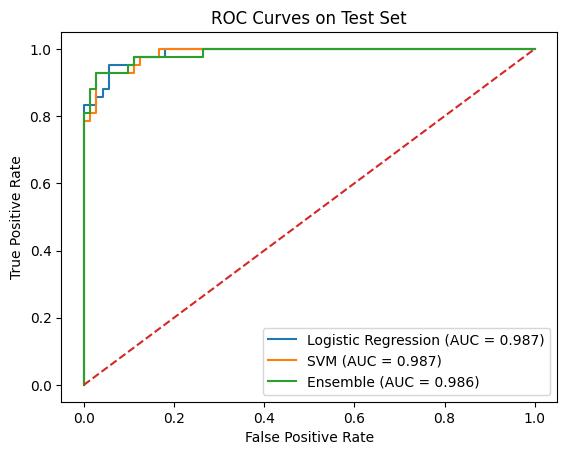

In [90]:
X_test_rfe = X_test_preprocessed[:, rfe_selector.support_]

for name, model in [
    ('Logistic Regression', best_lr),
    ('SVM', best_svm),
    ('Ensemble', best_ens)
]:
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    y_proba = model.predict_proba(X_test_rfe)[:,1]
    
    print(f'\n{name}')
    print(classification_report(y_test, y_pred, digits=4))
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')
plt.show()

## Model Interpretation

### Feature Importances from Logistic Regression

In [91]:
coef = best_lr.coef_.ravel()
features = X.columns[rfe_selector.support_]
imp_lr = pd.Series(coef, index=features).abs().sort_values(ascending=False)
imp_lr

concave points_worst    0.421061
concave points_mean     0.380369
perimeter_worst         0.360757
radius_worst            0.357163
area_worst              0.322412
texture_worst           0.299287
radius_se               0.235491
area_se                 0.211232
dtype: float64

### Permutation Feature Importance for SVM

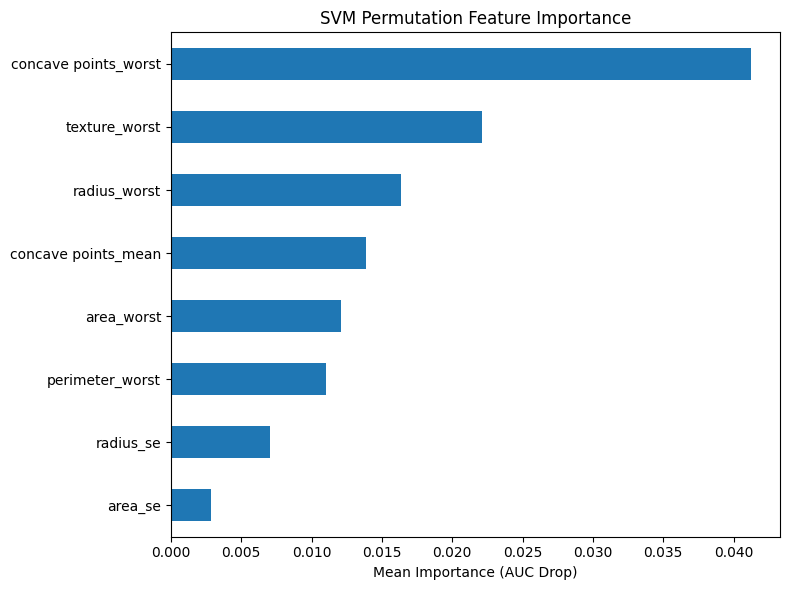

In [92]:
result = permutation_importance(
    best_svm,
    X_test_rfe, y_test,
    n_repeats=30,
    scoring='roc_auc',
    random_state=42
)

sorted_idx = result.importances_mean.argsort()
pd.Series(result.importances_mean[sorted_idx], index=features[sorted_idx]).plot(
    kind='barh', figsize=(8,6), title='SVM Permutation Feature Importance'
)
plt.xlabel('Mean Importance (AUC Drop)')
plt.tight_layout()
plt.show()


### Ensemble Components Contributions

In [93]:
weights = best_ens.named_estimators_
for name, est in best_ens.named_estimators_.items():
    score = est.score(X_test_rfe, y_test)
    print(name, np.round(score, 3))

lr 0.939
svc 0.947
rf 0.947


## Conclusion

Based on the final test set evaluation, all three selected models—Logistic Regression, SVM, and the Ensemble Classifier—performed strongly, achieving accuracy scores around 94.7%. The Support Vector Machine (SVM) and Ensemble both reached an overall accuracy of 94.74%, with balanced precision and recall across both classes, and F1-scores above 0.92 for malignant cases. Notably, the SVM slightly outperformed the others on precision and F1-score for malignant tumors, indicating a better balance between false positives and false negatives.

While Logistic Regression achieved a slightly lower overall accuracy (93.86%), it had perfect recall (1.00) for benign cases and perfect precision (1.00) for malignant cases, suggesting it errs on the side of caution—highly useful in medical diagnosis where minimizing false negatives is critical. All models demonstrated excellent generalization from training to testing, affirming the effectiveness of the RFE feature selection and the selected algorithms.